In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from math import log2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, f, shapiro, levene, bartlett

In [ ]:
loc = r'/content/Reto2_Eficacia_Tratamientos.csv'
tratamientos_diabetes = pd.read_csv(loc)

In [ ]:
tratamientos_diabetes

,Tratamiento,Eficacia
0,A,82.573999
1,A,70.915186
2,A,76.214969
3,A,74.650844
4,A,88.580733
...,...,...
145,C,77.131499
146,C,74.821591
147,C,75.485233
148,C,74.742663


# Análisis Exploratorio

In [ ]:
tratamiento_A = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'A']['Eficacia']
tratamiento_B = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'B']['Eficacia']
tratamiento_C = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'C']['Eficacia']

tratamientos = [tratamiento_A, tratamiento_B, tratamiento_C]
grupos = ['A', 'B', 'C']

### Análisis de cada grupo

In [ ]:
stats_descriptivas = tratamientos_diabetes.groupby('Tratamiento')['Eficacia'].describe().round(2)
stats_descriptivas

,count,mean,std,min,25%,50%,75%,max
Tratamiento,,,,,,,,
A,50.0,81.78,10.26,59.53,74.30,80.34,88.78,102.66
B,50.0,84.27,13.45,57.12,74.83,83.97,92.68,116.34
C,50.0,73.11,11.90,38.69,67.73,74.13,79.41,96.28


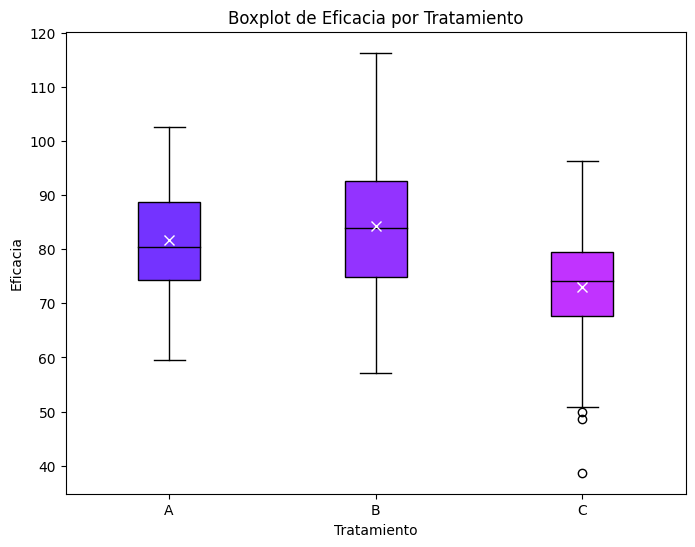

In [ ]:
plt.figure(figsize=(8, 6))
bp = plt.boxplot(tratamientos,
            labels=['A', 'B', 'C'],
            showmeans=True,
            patch_artist=True,
            medianprops=dict(color='black'),
            meanprops=dict(marker='x', markerfacecolor='white',markeredgecolor='white', markersize=7))

colores = ['#7433FF','#9333FF', '#C133FF']
for box, color in zip(bp['boxes'], colores):
    box.set(facecolor=color)

plt.xlabel('Tratamiento')
plt.ylabel('Eficacia')
plt.title('Boxplot de Eficacia por Tratamiento')

#plt.grid(True)
plt.show()

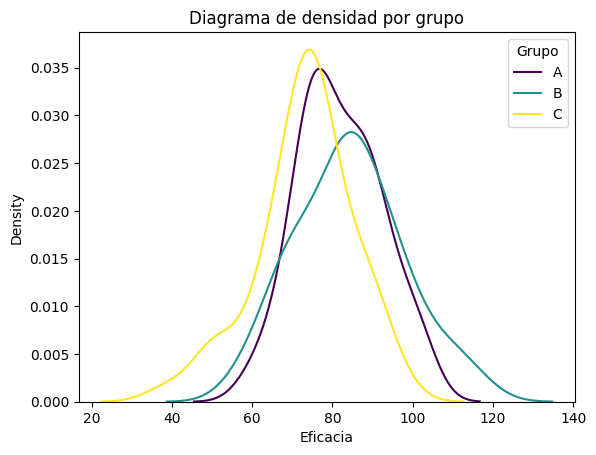

In [ ]:
for i in range(3):
    sns.kdeplot(tratamientos[i], label=grupos[i], color=plt.cm.viridis(i/2))

plt.title('Diagrama de densidad por grupo')
plt.legend(title='Grupo')
plt.show()

### Visualización de normalidad por grupo

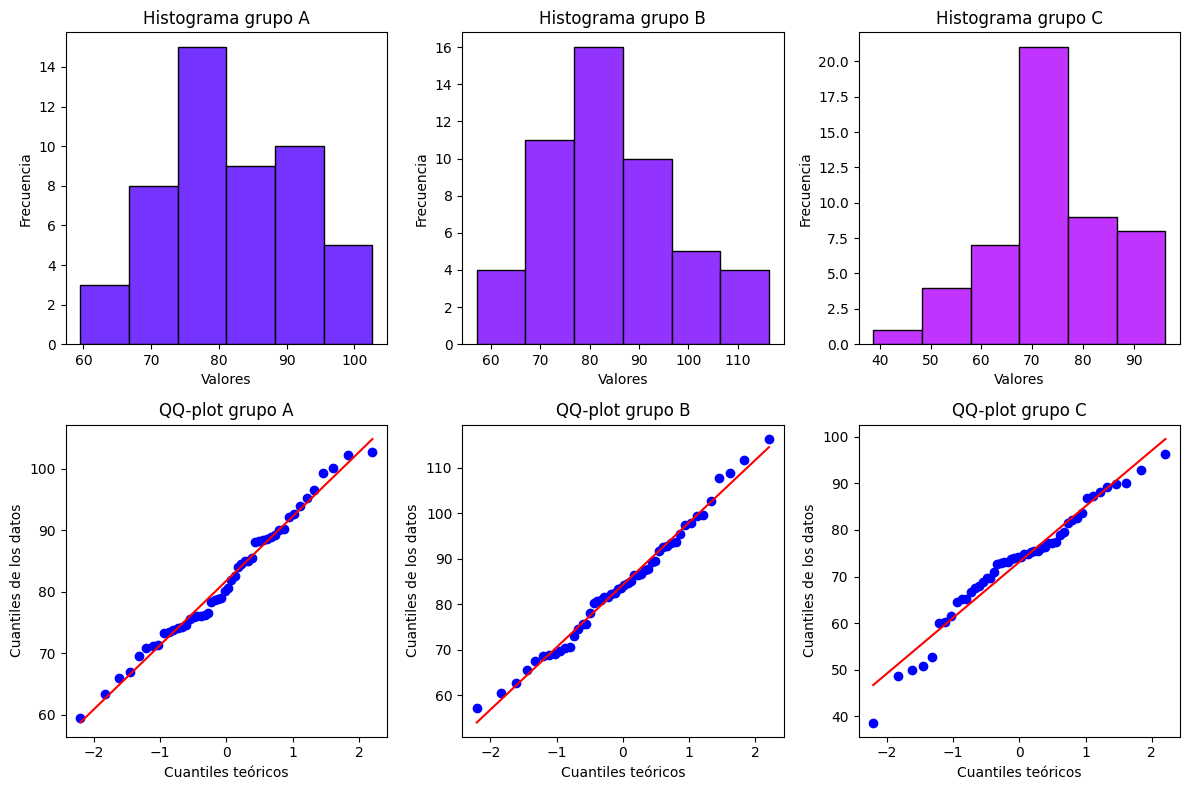

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
intervalos = int(1+log2(len(tratamientos[0]))) #Todas las muestras tienen el mismo tamaño - Regla de Sturges
colores = ['#7433FF','#9333FF', '#C133FF']

for j in range(3):
  ax = axs[0, j]
  ax.hist(tratamientos[j], bins=intervalos, color = colores[j],  edgecolor='black')
  ax.set_title(f'Histograma grupo {grupos[j]}')
  ax.set_xlabel('Valores')
  ax.set_ylabel('Frecuencia')

for k in range(3):
  ax = axs[1, k]
  stats.probplot(tratamientos[k], plot=ax)
  ax.set_title(f'QQ-plot grupo {grupos[k]}')
  ax.set_xlabel('Cuantiles teóricos')
  ax.set_ylabel('Cuantiles de los datos')

plt.tight_layout()
plt.show()

# Prueba ANOVA de un factor

In [ ]:
grupo_a = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'A']['Eficacia']
grupo_b = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'B']['Eficacia']
grupo_c = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'C']['Eficacia']

###Primer Supuesto : Las Poblaciones se Distribuyen Normal


Para comprobar que nuestros datos provienen de una distribución normal usaremos la prueba de Shapiro Wilk

Hipótesis nula (H0): La muestra proviene de una población con una distribución normal.

Hipótesis alternativa (H1): La muestra no proviene de una población con una distribución normal.

In [ ]:
# Verificar normalidad en cada grupo
shapiro_test_grupo_a = shapiro(grupo_a)
shapiro_test_grupo_b = shapiro(grupo_b)
shapiro_test_grupo_c = shapiro(grupo_c)

print("Prueba de Shapiro-Wilk para Grupo A:", shapiro_test_grupo_a)
print("Prueba de Shapiro-Wilk para Grupo B:", shapiro_test_grupo_b)
print("Prueba de Shapiro-Wilk para Grupo C:", shapiro_test_grupo_c)

Prueba de Shapiro-Wilk para Grupo A: ShapiroResult(statistic=0.9823750257492065, pvalue=0.6555035710334778)
Prueba de Shapiro-Wilk para Grupo B: ShapiroResult(statistic=0.9870157837867737, pvalue=0.8535816669464111)
Prueba de Shapiro-Wilk para Grupo C: ShapiroResult(statistic=0.9626771211624146, pvalue=0.11509501188993454)


Usando una significancia del 0,05
podemos ver que para las tres muestras los p-valores son mayores que la significancia. Por lo tanto no hay suficiente evidencia cientifica para rechazar la hipótesis nula, asi que ambas muestras provienen de una distribución normal.

### Segundo Supuesto: Homogeneidad de Varianzas

Para verificar el supuesto que las varianzas de los datos son iguales usaremos el test Bartlett.

Hipótesis nula (H0): Las varianzas de todos los grupos son iguales (homogeneidad de varianzas).

Hipótesis alternativa (H1): Al menos una de las varianzas es diferente.

In [ ]:
# Verificar homogeneidad de varianzas entre los grupos
levene_test = levene(grupo_a, grupo_b, grupo_c)
print("Prueba de Levene para homogeneidad de varianzas:", levene_test)

print("se cumplen los supuestos ")

Prueba de Levene para homogeneidad de varianzas: LeveneResult(statistic=1.1387721652602372, pvalue=0.3230201877430276)
se cumplen los supuestos 


In [ ]:
# Realizar la prueba de Bartlett
estadistica_bartlett, p_valor_bartlett = bartlett(grupo_a,grupo_b,grupo_c)

# Imprimir los resultados
print("Estadística de prueba de Bartlett:", estadistica_bartlett)
print("Valor p de la prueba de Bartlett:", p_valor_bartlett)

# Interpretar los resultados
nivel_significancia = 0.05
if p_valor_bartlett < nivel_significancia:
    print("Las varianzas de los grupos son diferentes (rechazamos H0)")
else:
    print("Las varianzas de los grupos son iguales (no rechazamos H0)")

Estadística de prueba de Bartlett: 3.5258958194536407
Valor p de la prueba de Bartlett: 0.17153843791121673
Las varianzas de los grupos son iguales (no rechazamos H0)


Usando una significancia del 0,05 podemos ver que el p-valor es mayor que la significancia. Por lo tanto no hay suficiente evidencia cientifica para rechazar la hipótesis nula, las varianzas de las muestras son iguales.

**Ya que los supuestos se cumplieron, podemos realizar la prueba ANOVA con normalidad sin necesidad de transformar los datos**

### Código de la prueba

In [ ]:
def anova(a, b, c, sign=0.05):
    # Tamaño de cada grupo
    tamaños_grupos = [len(a), len(b), len(c)]

    # Media de cada grupo
    media_a = np.mean(a)
    media_b = np.mean(b)
    media_c = np.mean(c)

    # Media de todos los datos
    todos_los_datos = np.concatenate([a, b, c])
    media_total = np.mean(todos_los_datos)

    # Suma de cuadrados total (STC)
    stc = np.sum((todos_los_datos - media_total)**2)

    # Suma de cuadrados entre grupos (SCTR)
    sctr = np.sum(tamaños_grupos * (np.array([media_a, media_b, media_c]) - media_total)**2)

    # Suma de cuadrados dentro de los grupos (SCD)
    scd = np.sum((a - media_a)**2) + np.sum((b - media_b)**2) + np.sum((c - media_c)**2)

    # Suma de cuadrados de los errores (SCE)
    sce = stc - sctr

    # Grados de libertad
    gl_num = len(tamaños_grupos) - 1
    gl_dem = len(todos_los_datos) - len(tamaños_grupos)

    # Calcular la estadística F
    F = ((sctr / gl_num) / (sce / gl_dem))

    # Calcular el valor p
    valor_p = 1 - stats.f.cdf(F, gl_num, gl_dem)  # Corrección aquí

    # Imprimir resultados
    if sign > valor_p:
        print("Hay suficiente evidencia para rechazar Ho: Las medias poblacionales son diferentes")
    else:
        print("No hay suficiente evidencia para rechazar Ho: Las medias poblacionales son iguales")

    # Tabla ANOVA
    datos = {
        'Fuente Var': ["Tratamientos", "Error", "Total"],
        'Suma Cuad': [sctr, sce, stc],
        'Gl': [gl_num, gl_dem, gl_num + gl_dem],
        'Cuadr Med': [(sctr / gl_num), (sce / gl_dem), ''],
        'F': ['', F, ''],
        'Valor-p': ['', valor_p, '']
    }
    # Crear DataFrame con los datos de la tabla ANOVA
    tabla_anova = pd.DataFrame(datos)
    print("\nTabla ANOVA:")
    print(tabla_anova)

# Asegúrate de reemplazar grupo_a, grupo_b, grupo_c con tus datos reales
anova(grupo_a, grupo_b, grupo_c)

Hay suficiente evidencia para rechazar Ho: Las medias poblacionales son diferentes

Tabla ANOVA:
     Fuente Var     Suma Cuad   Gl    Cuadr Med          F   Valor-p
0  Tratamientos   3429.288719    2  1714.644359                     
1         Error  20958.358238  147   142.573866  12.026358  0.000015
2         Total  24387.646957  149                                  


# Prueba de Kruskal-Wallis

### Hipótesis:

Hipótesis nula $(H_0)$: Las medianas de los tres grupos es igual.

Hipótesis alternativa $(H_A)$: Al menos la mediana de uno de los grupos difiere de las demás.

### Supuestos:
#### 1. La variable de respuesta es ordinal o continua


#### 2. Independencia entre grupos

#### 3. Las distribuciones de cada grupo tienen formas similares

### Supuesto de que las distribuciones de cada grupo tienen formas similares

In [ ]:
# Realizar la prueba de Kolmogorov-Smirnov
statistic, p_value = stats.ks_2samp(tratamiento_A, tratamiento_B)

# Imprimir los resultados
print("Estadística de prueba:", statistic)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.")
else:
    print("Se rechaza la hipótesis nula: Las distribuciones de los dos grupos son diferentes.")


Estadística de prueba: 0.18
Valor p: 0.3959398631708505
No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.


In [ ]:
# Realizar la prueba de Kolmogorov-Smirnov
statistic, p_value = stats.ks_2samp(tratamiento_A, tratamiento_C)

# Imprimir los resultados
print("Estadística de prueba:", statistic)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.")
else:
    print("Se rechaza la hipótesis nula: Las distribuciones de los dos grupos son diferentes.")

Estadística de prueba: 0.34
Valor p: 0.005841778142694731
Se rechaza la hipótesis nula: Las distribuciones de los dos grupos son diferentes.


Se le aplica logaritmo para ver si ahora se cumple el supuesto

In [ ]:
tratamientos_diabetes['Log Eficacia'] = tratamientos_diabetes['Eficacia'].apply(np.log)
tratamientos_diabetes

,Tratamiento,Eficacia,Log Eficacia
0,A,82.573999,4.413695
1,A,70.915186,4.261485
2,A,76.214969,4.333558
3,A,74.650844,4.312822
4,A,88.580733,4.483914
...,...,...,...
145,C,77.131499,4.345512
146,C,74.821591,4.315106
147,C,75.485233,4.323937
148,C,74.742663,4.314051


In [ ]:
log_trat_A = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'A']['Log Eficacia']
log_trat_B = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'B']['Log Eficacia']
log_trat_C = tratamientos_diabetes[tratamientos_diabetes['Tratamiento'] == 'C']['Log Eficacia']

In [ ]:
# Realizar la prueba de Kolmogorov-Smirnov
statistic, p_value = stats.ks_2samp(log_trat_A, log_trat_B)

# Imprimir los resultados
print("Estadística de prueba:", statistic)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.")
else:
    print("Se rechaza la hipótesis nula: Las distribuciones de los dos grupos son diferentes.")

Estadística de prueba: 0.18
Valor p: 0.3959398631708505
No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.


In [ ]:
# Realizar la prueba de Kolmogorov-Smirnov
statistic, p_value = stats.ks_2samp(log_trat_A, log_trat_C)

# Imprimir los resultados
print("Estadística de prueba:", statistic)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Las distribuciones de los dos grupos son similares.")
else:
    print("Se rechaza la hipótesis nula: Las distribuciones de los dos grupos son diferentes.")

Estadística de prueba: 0.34
Valor p: 0.005841778142694731
Se rechaza la hipótesis nula: Las distribuciones de los dos grupos son diferentes.


Finalmente este supuesto no se pudo cumplir, pero se realizará la prueba de Kruskal-Wallis con los datos transformados y sin transformar



## Código de la prueba

In [ ]:
#Todos los valores son diferentes, por lo que todos los rangos de orden son diferentes
tratamientos_diabetes['Log Eficacia'].nunique() == len(tratamientos_diabetes['Eficacia'])

True

In [ ]:
total = len(tratamientos_diabetes['Eficacia'])

In [ ]:
tratamientos_diabetes_ord = tratamientos_diabetes.sort_values(by='Eficacia')
tratamientos_diabetes_ord['Rangos'] = list(range(1, total + 1))
tratamientos_diabetes_ord

,Tratamiento,Eficacia,Log Eficacia,Rangos
106,C,38.691122,3.655610,1
137,C,48.648449,3.884620,2
108,C,49.991526,3.911854,3
122,C,50.766454,3.927236,4
101,C,52.721752,3.965028,5
...,...,...,...,...
82,B,102.797026,4.632756,146
84,B,107.746624,4.679782,147
98,B,108.874032,4.690192,148
86,B,111.729564,4.716081,149


In [ ]:
rangos_A = tratamientos_diabetes_ord[tratamientos_diabetes_ord['Tratamiento'] == 'A']['Rangos']
rangos_B = tratamientos_diabetes_ord[tratamientos_diabetes_ord['Tratamiento'] == 'B']['Rangos']
rangos_C = tratamientos_diabetes_ord[tratamientos_diabetes_ord['Tratamiento'] == 'C']['Rangos']

rangos = [rangos_A, rangos_B, rangos_C]

In [ ]:
cuadrados = sum([sum(r)**2 for r in rangos])/50

In [ ]:
H = (12/(total * (total + 1))) * cuadrados - 3*(total+1)
print('El estadístico de prueba (Valor H) es', H)

El estadístico de prueba (Valor H) es 18.45151788079471


In [ ]:
gL = 2 #Total categorías - 1

p_valor = 1 - chi2.cdf(H, df=gL)
print('El p-valor es', p_valor)

alpha = 0.05
if p_valor < alpha:
    print("Se rechaza la hipótesis nula: Hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay diferencias significativas entre los grupos.")

El p-valor es 9.846996891371695e-05
Se rechaza la hipótesis nula: Hay diferencias significativas entre los grupos.


Como el p-valor es menor a 0.05, se rechaza la hipótesis nula, es decir que no todas las medianas son iguales